In [1]:
# Import python packages
import numpy as np
import qiskit

# Add path for helpers
import sys  
sys.path.insert(0, '.')

from CHSH_helpers import *

sys.path.remove('.')

# Import qiskit packages
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options
from qiskit.circuit import Parameter

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum", instance="executive/internal/main")

# Define backends
use_real = True

if use_real:
    backend = service.backend('ibm_wellington')
else:
    backend = service.backend('ibmq_qasm_simulator')

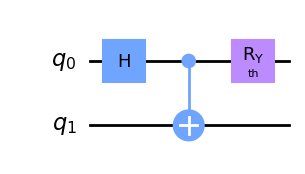

In [3]:
th = Parameter('th')
number_of_phases = 20
phases = np.linspace(0, 2*np.pi, number_of_phases)

# Build the circuits
chsh_circuits = build_chsh_circuit(th)

chsh_circuits.draw('mpl')

In [4]:
ops = ['ZZ','ZX','XZ','XX'] # Zeroth qubit is farthest to the right

options = Options()
options.resilience_level = 1
options.execution.shots = 1000

observables = build_observables(ops, number_of_phases)

# Run the experiments

estimator = Estimator(session=backend, options=options)
    
job = estimator.run(circuits=[chsh_circuits]*number_of_phases*4, 
                    observables=observables, parameter_values=[[ph] for ph in phases]*4)

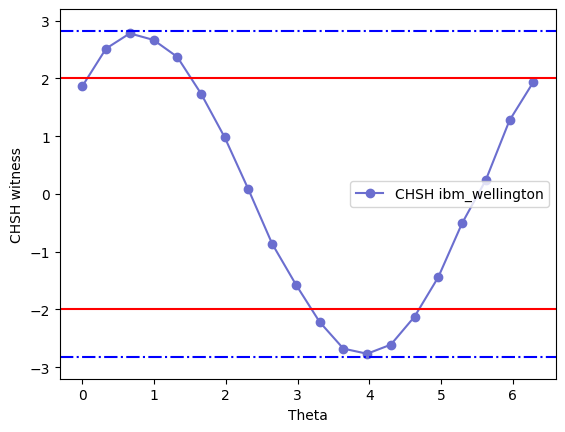

In [5]:
chsh2 = reconstruct_results(job, number_of_phases)
plot_results([chsh2], phases, [backend])